In [2]:
import os
import re

In [3]:
import tensorflow
import pandas as pd
import numpy
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4.8
import math
from sklearn.preprocessing import MinMaxScaler
#15, 6
import matplotlib.pyplot as plt
import time
#import statsmodels
#from statsmodels.tsa.stattools import adfuller
#import statsmodels.api as sm
import scipy
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn import metrics

In [4]:
import keras
from keras.models import Sequential
from keras.regularizers import l1, l2
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam, SGD
import keras.callbacks as callbacks
from keras.utils import np_utils
from keras.models import load_model
from keras import backend as K

Using TensorFlow backend.


In [5]:
dirin = '/home/webadmin/run3/'
dirout = '/home/webadmin/plots/'

In [6]:
job = joblib.load(dirin+'RawData_1_folds_1_inits_500_epochs_26103_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_80x60_neurons_sort_0_etbin_2_etabin_0_trn_desc.jbl')

In [45]:
a = 'RawData_1_folds_1_inits_500_epochs_26103_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_80x60_neurons_sort_0_etbin_2_etabin_0_trn_desc.jbl'

a.split('_')

['RawData',
 '1',
 'folds',
 '1',
 'inits',
 '500',
 'epochs',
 '26103',
 'batch',
 'size',
 'tanh',
 'hidden',
 'activation',
 'linear',
 'output',
 'activation',
 'kullback',
 'leibler',
 'divergence',
 'metric',
 'mean',
 'squared',
 'error',
 'loss',
 '80x60',
 'neurons',
 'sort',
 '0',
 'etbin',
 '2',
 'etabin',
 '0',
 'trn',
 'desc.jbl']

In [54]:
job[0].keys()

['epochs',
 'loss',
 'kullback_leibler_divergence',
 'val_losS',
 'val_kullback_leibler_divergence']

In [179]:
epochs = {}
loss = {}
kl = {}
val_loss = {}
val_kl = {}

layer = '40x20'
files = [f for f in os.listdir(dirin) if (f.endswith( ('.jbl') ) and f.split('_')[24] == layer)]
for file in files:
    job = joblib.load(dirin+file)
    print file.split('_')[27]
    epochs[int(file.split('_')[27])] = job[0]['epochs']
    loss[int(file.split('_')[27])] = job[0]['loss']
    kl[int(file.split('_')[27])] = job[0]['kullback_leibler_divergence']
    val_loss[int(file.split('_')[27])] = job[0]['val_losS']
    val_kl[int(file.split('_')[27])] = job[0]['val_kullback_leibler_divergence']


8
2
4
1
6
9
5
3
7
0


# Train MSE

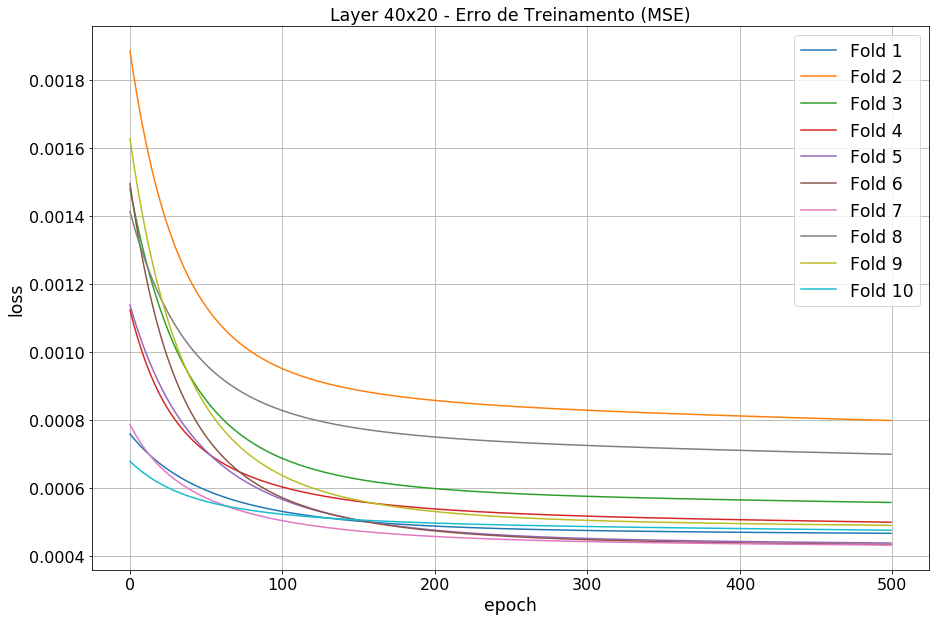

In [180]:
fig, ax = plt.subplots(1,figsize=(15,10))
list_t = []
for i in range(len(epochs.keys())):
    plt.plot(epochs[i],loss[i])
    #plt.plot(T[i].history['val_loss'])
    list_t.append('Fold %.f'%(i+1))
    plt.legend(list_t, loc='best',fontsize = 'xx-large')
plt.title('Layer '+layer+' - Erro de Treinamento (MSE)',fontsize= 'xx-large')
plt.ylabel('loss',fontsize= 'xx-large')
plt.xlabel('epoch',fontsize= 'xx-large')
plt.tick_params(axis='both',labelsize=16)
plt.grid()
plt.savefig(dirout+'layer_'+layer+'_loss.png')
plt.show()

# Val MSE

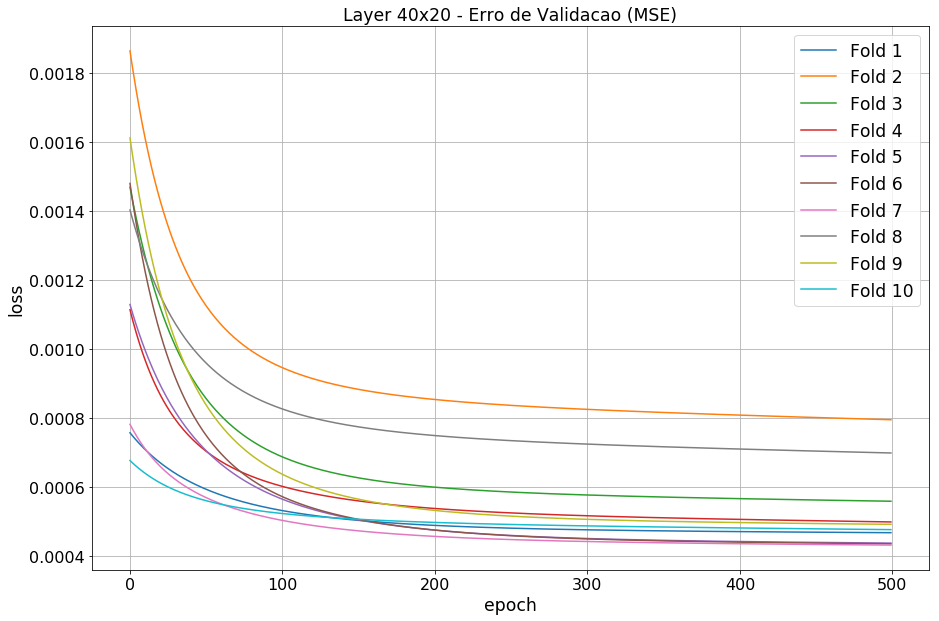

In [181]:
fig, ax = plt.subplots(1,figsize=(15,10))
list_t = []
for i in range(len(epochs.keys())):
    plt.plot(epochs[i],val_loss[i])
    #plt.plot(T[i].history['val_loss'])
    list_t.append('Fold %.f'%(i+1))
    plt.legend(list_t, loc='best',fontsize = 'xx-large')
plt.title('Layer '+layer+' - Erro de Validacao (MSE)',fontsize= 'xx-large')
plt.ylabel('loss',fontsize= 'xx-large')
plt.xlabel('epoch',fontsize= 'xx-large')
plt.tick_params(axis='both',labelsize=16)
plt.grid()
plt.savefig(dirout+'layer_'+layer+'_valloss.png')
plt.show()

# Train KL

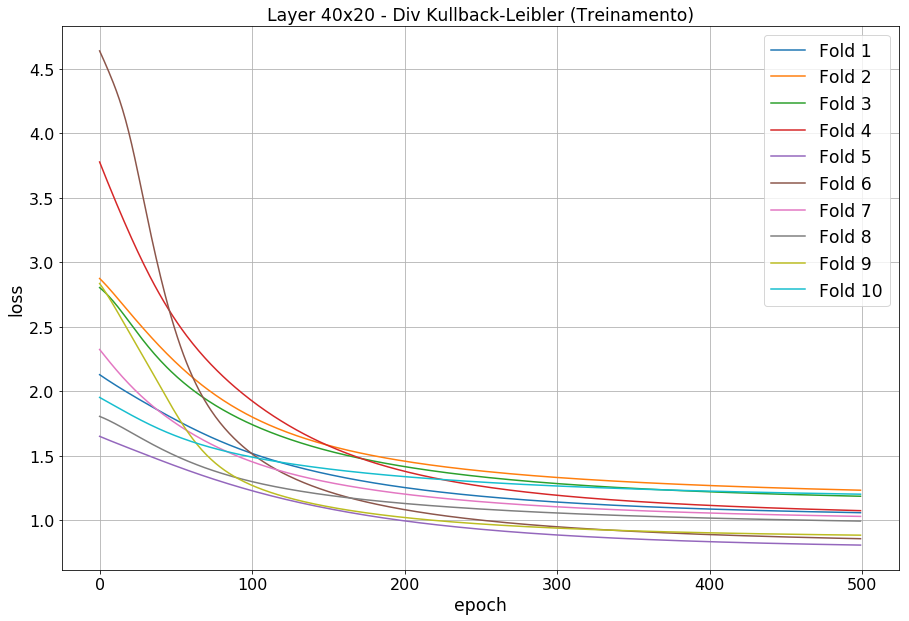

In [182]:
fig, ax = plt.subplots(1,figsize=(15,10))
list_t = []
for i in range(len(epochs.keys())):
    plt.plot(epochs[i],kl[i])
    #plt.plot(T[i].history['val_loss'])
    list_t.append('Fold %.f'%(i+1))
    plt.legend(list_t, loc='best',fontsize = 'xx-large')
plt.title('Layer '+layer+' - Div Kullback-Leibler (Treinamento)',fontsize= 'xx-large')
plt.ylabel('loss',fontsize= 'xx-large')
plt.xlabel('epoch',fontsize= 'xx-large')
plt.tick_params(axis='both',labelsize=16)
plt.grid()
plt.savefig(dirout+'layer_'+layer+'_kl.png')
plt.show()

# Val KL

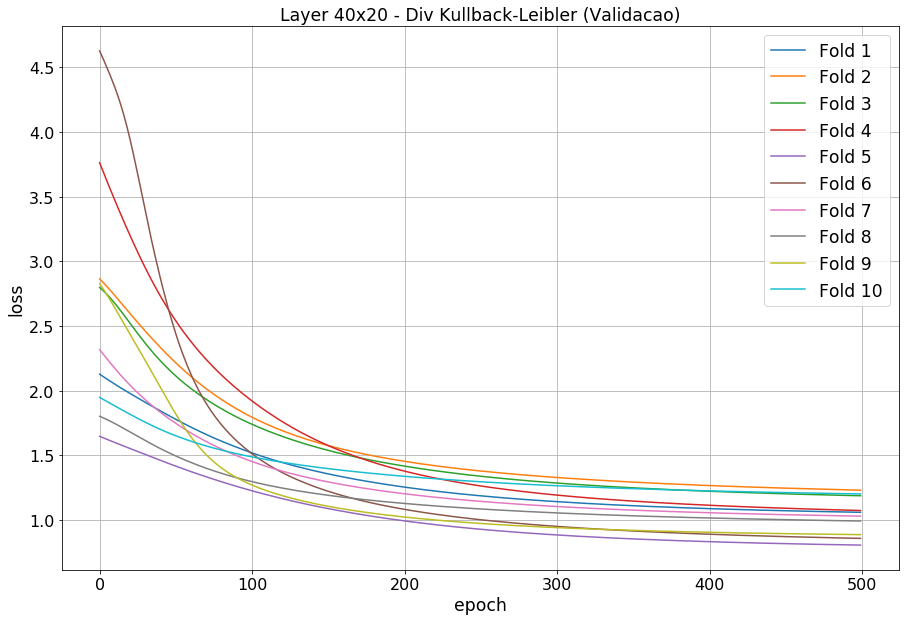

In [183]:
fig, ax = plt.subplots(1,figsize=(15,10))
list_t = []
for i in range(len(epochs.keys())):
    plt.plot(epochs[i],val_kl[i])
    #plt.plot(T[i].history['val_loss'])
    list_t.append('Fold %.f'%(i+1))
    plt.legend(list_t, loc='best',fontsize = 'xx-large')
plt.title('Layer '+layer+' - Div Kullback-Leibler (Validacao)',fontsize= 'xx-large')
plt.ylabel('loss',fontsize= 'xx-large')
plt.xlabel('epoch',fontsize= 'xx-large')
plt.tick_params(axis='both',labelsize=16)
plt.grid()
plt.savefig(dirout+'layer_'+layer+'_valkl.png')
plt.show()

In [ ]:
    def getDataProjection(self, data, trgt, hidden_neurons=[80], layer=1, ifold=0,sort=999,etBinIdx=999, etaBinIdx=999):
        if layer > len(hidden_neurons):
            print "[-] Error: The parameter layer must be less or equal to the size of list hidden_neurons"
            return 1
        proj_all_data = data #self.normalizeData(data=data, ifold=ifold)
        print sort,etBinIdx,etaBinIdx
        if layer == 1:
            neurons_str = self.getNeuronsString(data, hidden_neurons[:layer])
            previous_model_str = '%s/%s/%s_%i_folds_%s_%s_neurons'%(self.save_path,
                                                                    self.analysis_str,
                                                                    self.prefix_str,
                                                                    self.n_folds,
                                                                    self.params_str,
                                                                    neurons_str)
            if not self.development_flag:
                file_name = '%s_sort_%i_etbin_%i_etabin_%i_model.h5'%(previous_model_str,sort,etBinIdx, etaBinIdx)
            else:
                file_name = '%s_sort_%i_etbin_%i_etabin_%i_model_dev.h5'%(previous_model_str,sort,etBinIdx, etaBinIdx)

            # Check if previous layer model was trained
            if not os.path.exists(file_name):
                self.trainLayer(data=data, trgt=trgt, ifold=ifold, hidden_neurons = hidden_neurons[:layer], layer=layer, folds_sweep=True)

            layer_model = load_model(file_name, custom_objects={'%s'%self.trn_params.params['loss']: self.lossFunction})
            print "Loading Model: "+file_name
            get_layer_output = K.function([layer_model.layers[0].input],
                                          [layer_model.layers[1].output])
            # Projection of layer
            proj_all_data = get_layer_output([proj_all_data])[0]
        elif layer > 1:
            for ilayer in range(1,layer+1):
                neurons_str = self.getNeuronsString(data, hidden_neurons[:ilayer])
                previous_model_str = '%s/%s/%s_%i_folds_%s_%s_neurons'%(self.save_path,
                                                                        self.analysis_str,
                                                                        self.prefix_str,
                                                                        self.n_folds,
                                                                        self.params_str,
                                                                        neurons_str)
                if not self.development_flag:
                    file_name = '%s_sort_%i_etbin_%i_etabin_%i_model.h5'%(previous_model_str,sort,etBinIdx, etaBinIdx)
                else:
                    file_name = '%s_sort_%i_etbin_%i_etabin_%i_model_dev.h5'%(previous_model_str,sort,etBinIdx, etaBinIdx)

                # Check if previous layer model was trained
                if not os.path.exists(file_name):
                    self.trainLayer(data=data, trgt=trgt, ifold=ifold, hidden_neurons = hidden_neurons[:ilayer], layer=ilayer, folds_sweep=True)

                print "Loading Model: "+file_name
                layer_model = load_model(file_name, custom_objects={'%s'%self.trn_params.params['loss']: self.lossFunction})
                print "Model Loaded"
                get_layer_output = K.function([layer_model.layers[0].input],
                                              [layer_model.layers[1].output])
                # Projection of layer
                proj_all_data = get_layer_output([proj_all_data])[0]
        return proj_all_data

In [7]:
val_data = np.load('/home/webadmin/datasets/val_Data.npy')

In [8]:
val_data.shape

(1358079, 100)

In [253]:
model_40X20.layers[2].get_weights()[0].shape

(20, 40)

In [9]:
model_100X100 = load_model(dirin+'RawData_1_folds_1_inits_500_epochs_26103_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_100x100_neurons_sort_4_etbin_2_etabin_0_model.h5')
model_100X80 = load_model(dirin+'RawData_1_folds_1_inits_500_epochs_26103_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_100x80_neurons_sort_4_etbin_2_etabin_0_model.h5')
model_80X60 = load_model(dirin+'RawData_1_folds_1_inits_500_epochs_26103_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_80x60_neurons_sort_4_etbin_2_etabin_0_model.h5')
model_60X40 = load_model(dirin+'RawData_1_folds_1_inits_500_epochs_26103_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_60x40_neurons_sort_4_etbin_2_etabin_0_model.h5')
model_40X20 = load_model(dirin+'RawData_1_folds_1_inits_500_epochs_26103_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_40x20_neurons_sort_4_etbin_2_etabin_0_model.h5')

In [10]:
enc_weights_100X100 = model_100X100.layers[0].get_weights()
enc_weights_100X80 = model_100X80.layers[0].get_weights()
enc_weights_80X60 = model_80X60.layers[0].get_weights()
enc_weights_60X40 = model_60X40.layers[0].get_weights()
enc_weights_40X20 = model_40X20.layers[0].get_weights()

dec_weights_100X100 = model_100X100.layers[2].get_weights()
dec_weights_100X80 = model_100X80.layers[2].get_weights()
dec_weights_80X60 = model_80X60.layers[2].get_weights()
dec_weights_60X40 = model_60X40.layers[2].get_weights()
dec_weights_40X20 = model_40X20.layers[2].get_weights()

#model.add(Activation('tanh'))

In [11]:
model = Sequential()
model.add(Dense(100, input_dim=val_data.shape[1], weights=model_100X100.layers[0].get_weights()))
model.add(Dense(80, weights=enc_weights_100X80))
model.add(Dense(60, weights=enc_weights_80X60))
model.add(Dense(40, weights=enc_weights_60X40))
model.add(Dense(20, weights=enc_weights_40X20))
model.add(Dense(40, weights=dec_weights_40X20))
model.add(Dense(60, weights=dec_weights_60X40))
model.add(Dense(80, weights=dec_weights_80X60))
model.add(Dense(100, weights=dec_weights_100X80))
model.add(Dense(100, weights=dec_weights_100X100))
model.add(Activation('tanh'))

In [258]:
#from keras.utils import plot_model
#plot_model(model, to_file='model.png')

In [12]:
output_layer5 = model.predict(val_data, batch_size=1358079, verbose=1)

1358079/1358079 [==============================] - 6s 4us/step


In [263]:
output_layer4 = model.predict(val_data, batch_size=1358079, verbose=1)

1358079/1358079 [==============================] - 5s 3us/step


In [265]:
output_layer3 = model.predict(val_data, batch_size=1358079, verbose=1)

1358079/1358079 [==============================] - 4s 3us/step


In [268]:
output_layer2 = model.predict(val_data, batch_size=1358079, verbose=1)

1358079/1358079 [==============================] - 3s 2us/step


In [270]:
output_layer1 = model.predict(val_data, batch_size=1358079, verbose=1)

1358079/1358079 [==============================] - 2s 2us/step


In [ ]:
mi_layer1 = mutual_information_matrix_2(val_data.T,output_layer1.T)

In [ ]:
mi_layer2 = mutual_information_matrix_2(val_data.T,output_layer2.T)

In [ ]:
mi_layer3 = mutual_information_matrix_2(val_data.T,output_layer3.T)

In [ ]:
mi_layer4 = mutual_information_matrix_2(val_data.T,output_layer4.T)

In [15]:
mi_layer5 = mutual_information_matrix_2(val_data.T,output_layer5.T)

KeyboardInterrupt: 

In [32]:
import sklearn
im =[]
a=0
for i in range(100):    
    a = sklearn.metrics.normalized_mutual_info_score(val_data.T[i],output_layer5.T[i])

In [31]:
output_layer5.T[0].shape

(1358079,)

In [14]:
import numpy as np

def entropy(counts):
    '''Compute entropy.'''
    ps = counts/float(np.sum(counts))  # coerce to float and normalize
    ps = ps[np.nonzero(ps)]            # toss out zeros
    H = -sum(ps * np.log2(ps))   # compute entropy
    #H = scipy.stats.entropy(ps,base=2)
    return H

def mi(x, y):
    '''Compute mutual information'''
    bins = min( len(np.histogram(x,'fd')[0]), len(np.histogram(y,'fd')[0]))
    counts_xy = np.histogram2d(x, y, bins=bins)[0]
    counts_x  = np.histogram(x, bins=bins)[0]
    counts_y  = np.histogram(y, bins=bins)[0]
    
    H_xy = entropy(counts_xy)
    H_x  = entropy(counts_x)
    H_y  = entropy(counts_y)
    
    mi = H_x + H_y - H_xy
    #mi_normed = np.sqrt(1. - np.exp(-2 * mi))
    mi_normed = mi/(np.sqrt(H_x*H_y))
    return mi_normed
    #return mi
def mutual_information_matrix(data):
    #print(data.shape[0])
    matrix = np.zeros((data.shape[0], data.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            matrix[i][j] = mi(data[i], data[j])
    return matrix

def mutual_information_matrix_2(data,data2):
    #print(data.shape[0])
    matrix = np.zeros((data.shape[0], data.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            matrix[i][j] = mi(data[i], data2[j])
    return matrix

In [291]:
xxx = mutual_information_matrix_2(val_data,val_data)

In [292]:
xxx.shape

(100, 100)

In [302]:
val_data.T[0].shape

(1358079,)